In [1]:
# Make subset of 101 food dataset

import requests 
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# if image_path.is_dir():
#     print(f"[INFO] {image_path} directory exists, skipping dir creation.")
# else:
#     print(f"[INFO] Did not find {image_path} directory, creating one...")
#     image_path.mkdir(parents=True, exist_ok=True)

# # Download pizza, steak, sushi data
# with open(data_path/"pizza_steak_sushi.zip", "wb") as f:
#     print(f"[INFO] Downloading pizza, steak, sushi data...")
#     request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
#     f.write(request.content)

# # Unzip dataset
# with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zip_ref:
#     print(f"[INFO] Unzipping pizza, steak, sushi data...")
#     zip_ref.extractall(image_path)

In [2]:
### Data exploration
import os

def walk_through_dir(dir_path):
    """
    Walks through dir_path returning its contents.
    Args:
    dir_path (str): target directory

    Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


data\pizza_steak_sushi\test\sushi\2394442.jpg
sushi
Random image path: data\pizza_steak_sushi\test\sushi\2394442.jpg
Image class: sushi
Image shape: (512, 408)


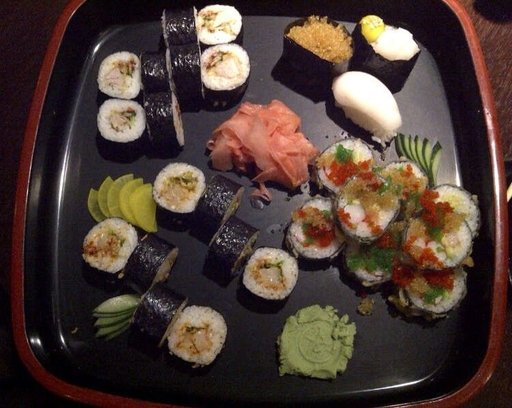

In [3]:
train_dir = image_path / "train"
test_dir = image_path / "test"

import random 
from PIL import Image

random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))
# image_path_list[:3]

random_image_path = random.choice(image_path_list)
print(random_image_path)

image_class = random_image_path.parent.stem
print(image_class)

img = Image.open(random_image_path)
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image shape: {img.size}")
img

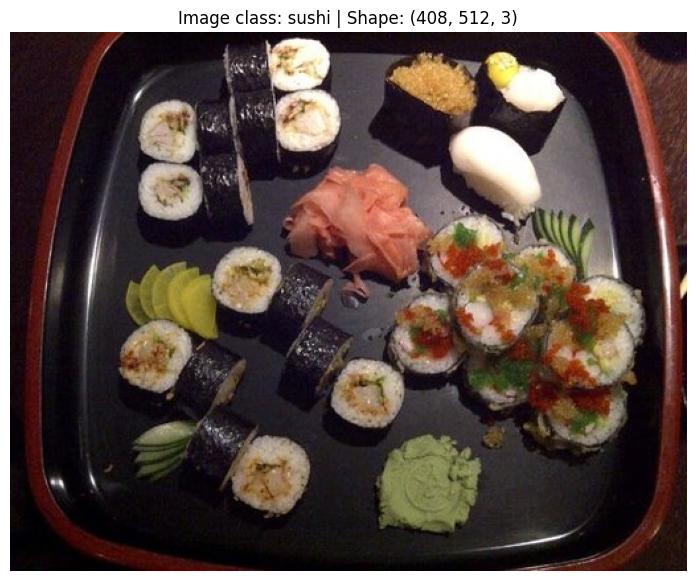

In [4]:
# Vizualize with matplotlib

import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Shape: {img_as_array.shape}")
plt.axis(False);



In [5]:
img_as_array.shape

(408, 512, 3)

In [6]:
# Transforming data

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
])

# data_transform(img)

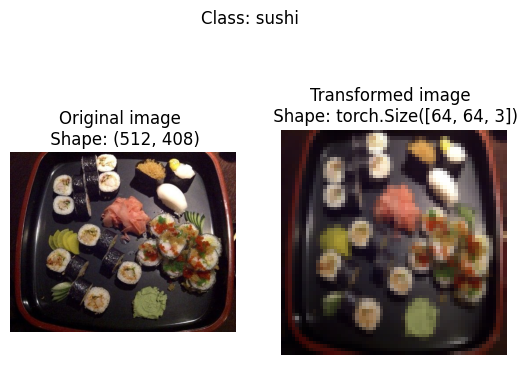

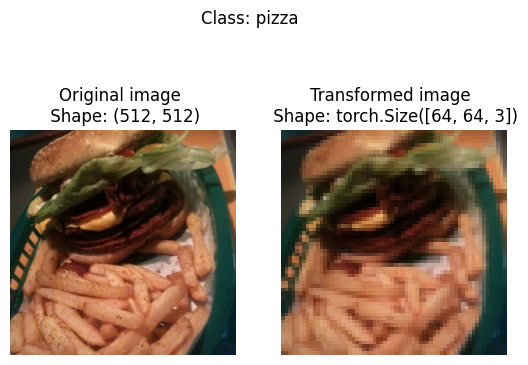

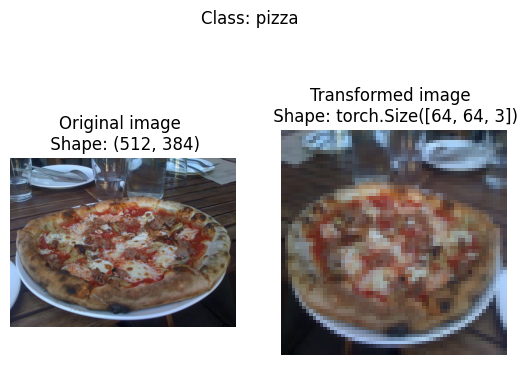

In [7]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as img:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(img)
            ax[0].set_title(f"Original image \n Shape: {img.size}")
            ax[0].axis(False);

            transformed_img = transform(img).permute(1, 2, 0)
            ax[1].imshow(transformed_img)
            ax[1].set_title(f"Transformed image \n Shape: {transformed_img.shape}")
            ax[1].axis(False);

            fig.suptitle(f"Class: {image_path.parent.stem}")

plot_transformed_images(image_path_list, data_transform, n=3, seed=42)


In [8]:
# Now create data loader using ImageFolder

from torchvision import datasets

train_data  = datasets.ImageFolder(root=train_dir, 
                                   transform=data_transform, 
                                   target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                transform=data_transform,)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [9]:
class_names = train_data.classes
class_names 

['pizza', 'steak', 'sushi']

In [10]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [11]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0

Original shape: torch.Size([3, 64, 64])
Permuted shape: torch.Size([64, 64, 3])


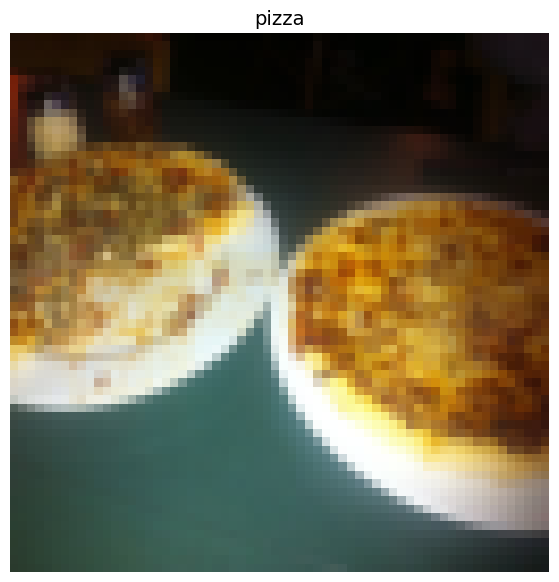

In [12]:
img_permute = img.permute(1, 2, 0)

print(f"Original shape: {img.shape}")
print(f"Permuted shape: {img_permute.shape}")

plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label], fontsize=14);

In [13]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1

train_dataloader = DataLoader(dataset=train_data, 
                            batch_size=BATCH_SIZE, 
                            num_workers=4, 
                            shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            num_workers=4,
                            shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1d8141a3d00>,
 <torch.utils.data.dataloader.DataLoader at 0x1d8141a32b0>)

In [14]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [15]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape}")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64])
Label shape: torch.Size([1])


In [16]:
# Replicate ImageFolder functionality, custom dataset

import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [17]:
target_directory = train_dir
target_directory

class_names_found = sorted([entry.name for entry in os.scandir(target_directory) if entry.is_dir()])
class_names_found

['pizza', 'steak', 'sushi']

In [18]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    classes = sorted([d.name for d in os.scandir(directory) if d.is_dir()])
    if not classes:
        raise FileNotFoundError(f"Couldn't find any class in {directory}")
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx

find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [19]:
from torch.utils.data import Dataset

class CustomImageDataset(Dataset):
    def __init__(self, targ_dir: str, transform: None):
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(targ_dir)

    def __len__(self) -> int:
        return len(self.paths)

    def load_image(self, idx):
        image_path = self.paths[idx]
        return Image.open(image_path)

    def __getitem__(self, idx) -> Tuple[torch.Tensor, int]:
        """Return a sample from the dataset, data and label."""
        img = self.load_image(idx)
        class_name = self.paths[idx].parent.name
        class_idx = self.class_to_idx[class_name]

        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx


In [20]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor(),
])

In [21]:
train_data_custom  = CustomImageDataset(targ_dir=train_dir, 
                                   transform=train_transforms)

test_data_custom = CustomImageDataset(targ_dir=test_dir,
                                transform=test_transforms)

train_data_custom, test_data_custom

(<__main__.CustomImageDataset at 0x1d8141ba800>,
 <__main__.CustomImageDataset at 0x1d8141b8970>)

In [22]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [23]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [24]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

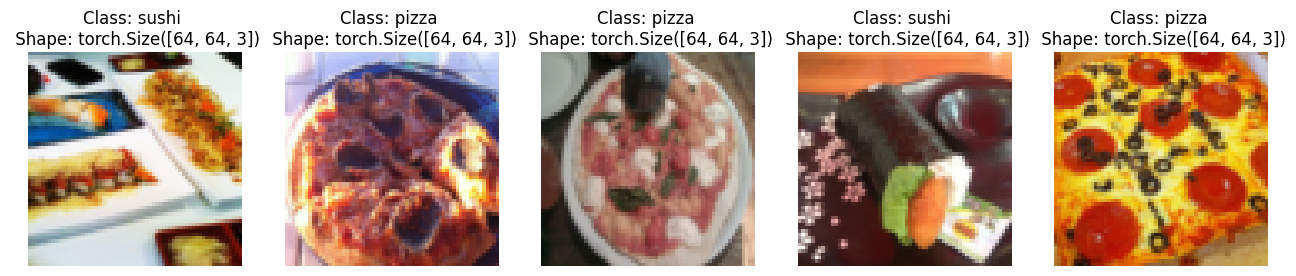

In [25]:
## Create function to display random images

def display_random_images(dataset:torch.utils.data.Dataset, 
                        classes: List[str], 
                        n: int = 10, 
                        display_shape: bool = True, 
                        seed: int = None):
    if n > 10:
        n = 10
        display_shape = False
        print(f"Displaying only {n} images.")

    if seed:
        random.seed(seed)

    random_samples_ix = random.sample(range(len(dataset)), k=n)

    plt.figure(figsize=(16, 7))

    for i, targ_sample in enumerate(random_samples_ix):
        image, label = dataset[targ_sample][0], dataset[targ_sample][1]

        image_adjust = image.permute(1, 2, 0)

        plt.subplot(1, n, i+1)
        plt.imshow(image_adjust)
        plt.axis(False)
        if classes:
            title=f"Class: {classes[label]}"
            if display_shape:
                title += f" \n Shape: {image_adjust.shape}"
            plt.title(title)

display_random_images(train_data, class_names, n=5, seed=42);


Displaying only 10 images.


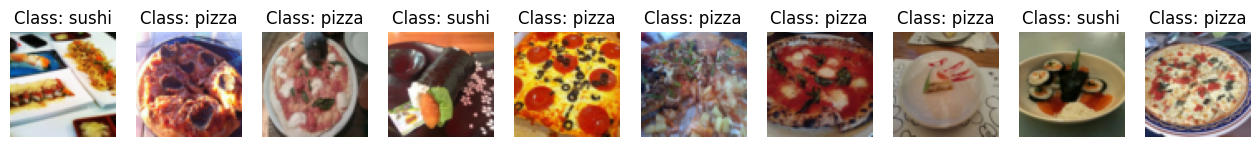

In [26]:
display_random_images(train_data_custom, class_names, n=40, seed=42);

In [27]:
from torch.utils.data import DataLoader

BATCH_SIZE = 64
# NUM_WORKERS = os.cpu_count()
NUM_WORKERS = 0 # very strange, in notebook this does not work with anything > 0

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                            batch_size=BATCH_SIZE,
                            num_workers=NUM_WORKERS,
                            shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                            batch_size=BATCH_SIZE,
                            num_workers=NUM_WORKERS,
                            shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x1d8141ba020>,
 <torch.utils.data.dataloader.DataLoader at 0x1d8141f7790>)

In [28]:
img_custom, label_custom = next(iter(train_dataloader_custom))

img_custom.shape, label_custom.shape

(torch.Size([64, 3, 64, 64]), torch.Size([64]))

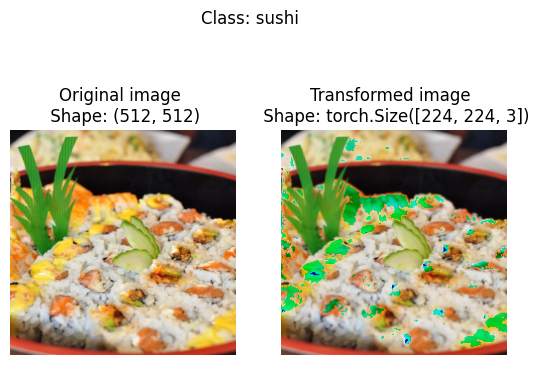

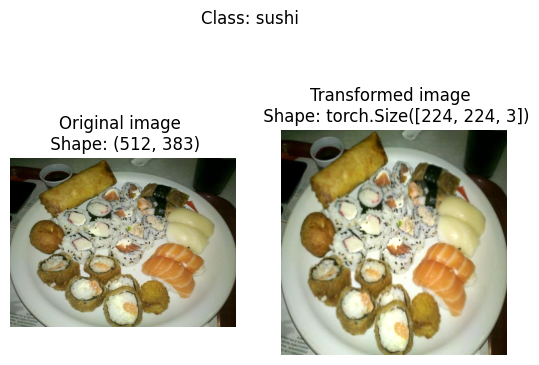

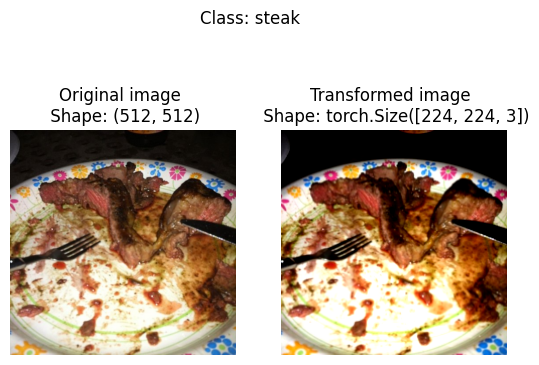

In [29]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor(),
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
])

def plot_transformed_images(image_paths, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as img:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(img)
            ax[0].set_title(f"Original image \n Shape: {img.size}")
            ax[0].axis(False);

            transformed_img = transform(img).permute(1, 2, 0)
            ax[1].imshow(transformed_img)
            ax[1].set_title(f"Transformed image \n Shape: {transformed_img.shape}")
            ax[1].axis(False);

            fig.suptitle(f"Class: {image_path.parent.stem}")

plot_transformed_images(image_path_list, train_transforms, n=3, seed=None)


### Compare training without and with augmentation




In [30]:
# Transforming data

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor(),
])

# Now create data loader using ImageFolder
train_data_simple  = datasets.ImageFolder(root=train_dir, 
                                   transform=simple_transform, 
                                   target_transform=None)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                transform=simple_transform)

# train_data, test_data

from torch.utils.data import DataLoader

BATCH_SIZE = 32
# NUM_WORKERS = os.cpu_count()
NUM_WORKERS = 0 # very strange, in notebook this does not work with anything > 0

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                            batch_size=BATCH_SIZE,
                            num_workers=NUM_WORKERS,
                            shuffle=True)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                            batch_size=BATCH_SIZE,
                            num_workers=NUM_WORKERS,
                            shuffle=False)

train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x1d815817e50>,
 <torch.utils.data.dataloader.DataLoader at 0x1d8158174c0>)

In [31]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

class TinyVGG(nn.Module):
    """Replicates TinyVGG Model."""
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16, out_features=output_shape)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv_block1(x)
        # print(x.shape)
        x = self.conv_block2(x)
        # print(x.shape)
        x = self.classifier(x)
        return x
    
torch.manual_seed(42)

model_0 = TinyVGG(
    input_shape=3, hidden_units=10, output_shape=len(class_names)
).to(device)

# model_2(torch.rand(1, 3, 64, 64).to(device))

In [32]:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape

torch.Size([32, 3, 64, 64])

In [33]:
model_0(image_batch.to(device)).shape

torch.Size([32, 3])

In [36]:
from torchinfo import summary

summary(model_0, input_size=(1, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [77]:
from tqdm.autonotebook import tqdm

def print_train_time(start: float, end: float, device: str) -> None:
    """Prints difference between start and end time.
    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.
    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"\nTrain time on {device}: {total_time:.3f} seconds")
    return total_time

def train_step(model: torch.nn.Module, 
            data_loader: torch.utils.data.DataLoader, 
            loss_fn: torch.nn.Module,       
            optimizer: torch.optim.Optimizer,
            device: torch.device = device) -> None:

    model.train()
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step() # Update the parameters once per batch

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    train_loss = train_loss / len(data_loader)
    train_acc = train_acc / len(data_loader)

    return train_loss, train_acc

def test_step(model: torch.nn.Module,
            data_loader: torch.utils.data.DataLoader,
            loss_fn: torch.nn.Module,
            device: torch.device = device) -> None:

    model.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            
            test_pred_logits = model(X)

            # Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    test_loss = test_loss / len(data_loader)
    test_acc = test_acc / len(data_loader)
    
    return test_loss, test_acc

def train(model: torch.nn.Module, 
            train_data_loader: torch.utils.data.DataLoader, 
            test_data_loader: torch.utils.data.DataLoader, 
            optimizer: torch.optim.Optimizer, 
            loss_fn: torch.nn.Module,
            epochs: int = 1,
            device: torch.device = device) -> Dict[str, List[float]]:

    results = {
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    for epoch in tqdm(range(epochs)):
        print(f"")

        # Train loop
        train_loss, train_acc = train_step(model, train_data_loader, loss_fn, optimizer, device=device)

        # Test loop
        test_loss, test_acc = test_step(model, test_data_loader, loss_fn, device=device)

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

        print (f"Epoch: {epoch} | Train loss: {train_loss:.5f}, Train accuracy: {train_acc:.4f}, Test loss: {test_loss:.5f}, Test accuracy: {test_acc:.4f}\n-------------------------------")

    return results

In [115]:


from helper_functions import accuracy_fn
from timeit import default_timer

torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

start_time = default_timer()

epochs = 10

model_0_results = train(model=model_0, 
            train_data_loader=train_dataloader_simple, 
            test_data_loader=test_dataloader_simple, 
            optimizer=optimizer, 
            loss_fn=loss_fn, 
            epochs=epochs,
            device=device)

end_time = default_timer()
tr_time_model_2 = print_train_time(start_time, end_time, device=str(next(model_0.parameters()).device))
model_0_results

  0%|          | 0/10 [00:00<?, ?it/s]


Epoch: 0 | Train loss: 1.08594, Train accuracy: 0.4258, Test loss: 1.15764, Test accuracy: 0.2604
-------------------------------

Epoch: 1 | Train loss: 1.08479, Train accuracy: 0.4258, Test loss: 1.15958, Test accuracy: 0.2604
-------------------------------

Epoch: 2 | Train loss: 1.08461, Train accuracy: 0.4258, Test loss: 1.16006, Test accuracy: 0.2604
-------------------------------

Epoch: 3 | Train loss: 1.11658, Train accuracy: 0.3047, Test loss: 1.15756, Test accuracy: 0.2604
-------------------------------

Epoch: 4 | Train loss: 1.08672, Train accuracy: 0.4258, Test loss: 1.15765, Test accuracy: 0.2604
-------------------------------

Epoch: 5 | Train loss: 1.10782, Train accuracy: 0.3047, Test loss: 1.15805, Test accuracy: 0.2604
-------------------------------

Epoch: 6 | Train loss: 1.09826, Train accuracy: 0.3047, Test loss: 1.16159, Test accuracy: 0.1979
-------------------------------

Epoch: 7 | Train loss: 1.09463, Train accuracy: 0.2930, Test loss: 1.15915, Test a

{'train_loss': [1.0859389454126358,
  1.0847925022244453,
  1.0846093744039536,
  1.116577997803688,
  1.0867183655500412,
  1.107815533876419,
  1.0982646048069,
  1.0946311205625534,
  1.121233657002449,
  1.0918002724647522],
 'train_acc': [0.42578125,
  0.42578125,
  0.42578125,
  0.3046875,
  0.42578125,
  0.3046875,
  0.3046875,
  0.29296875,
  0.3046875,
  0.42578125],
 'test_loss': [1.1576380133628845,
  1.1595838864644368,
  1.1600603063901265,
  1.1575551827748616,
  1.1576451063156128,
  1.158046543598175,
  1.1615910927454631,
  1.1591489712397258,
  1.1224440733591716,
  1.1293700536092122],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.19791666666666666,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667]}

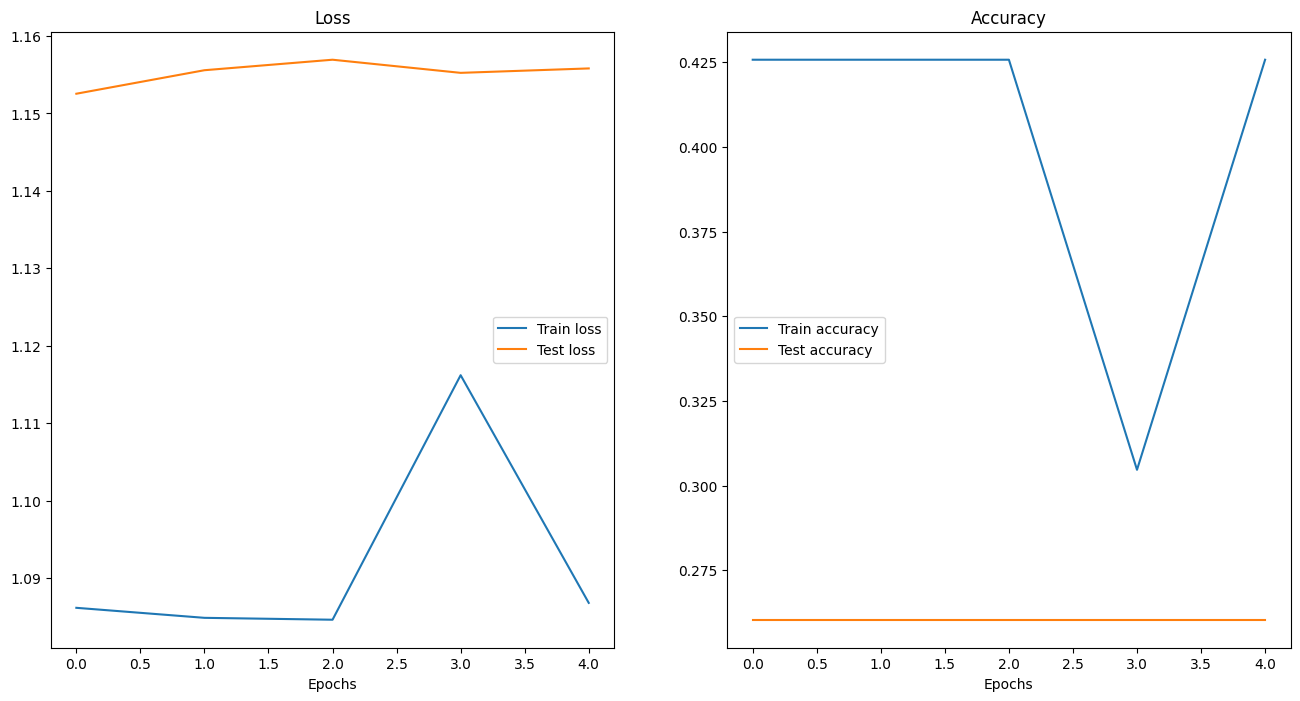

In [99]:
# excellent guide showing loss curve debugging: https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic
# plot the loss curves

def plot_loss_curves(results: Dict[str, List[float]]) -> None:
    train_loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(0, len(train_loss))

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label="Train loss")
    plt.plot(epochs, test_loss, label="Test loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="Train accuracy")
    plt.plot(epochs, test_accuracy, label="Test accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

    plt.show()

plot_loss_curves(model_0_results)

### Now try with data augmentations

In [100]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor() 
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [101]:
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1d9a7bd5300>,
 <torch.utils.data.dataloader.DataLoader at 0x1d8141a32b0>)

In [102]:
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [103]:
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_1
model_1_results = train(model=model_1, 
                        train_data_loader=train_dataloader_augmented,
                        test_data_loader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

tr_time_model_1 = print_train_time(start_time, end_time, device=str(next(model_1.parameters()).device))
model_1_results


  0%|          | 0/10 [00:00<?, ?it/s]


Epoch: 0 | Train loss: 1.10737, Train accuracy: 0.2500, Test loss: 1.10588, Test accuracy: 0.2604
-------------------------------

Epoch: 1 | Train loss: 1.07896, Train accuracy: 0.4258, Test loss: 1.13851, Test accuracy: 0.2604
-------------------------------

Epoch: 2 | Train loss: 1.08047, Train accuracy: 0.4258, Test loss: 1.16877, Test accuracy: 0.2604
-------------------------------

Epoch: 3 | Train loss: 1.12863, Train accuracy: 0.3047, Test loss: 1.16245, Test accuracy: 0.2604
-------------------------------

Epoch: 4 | Train loss: 1.08849, Train accuracy: 0.4258, Test loss: 1.14792, Test accuracy: 0.2604
-------------------------------

Epoch: 5 | Train loss: 1.09721, Train accuracy: 0.3047, Test loss: 1.14717, Test accuracy: 0.2604
-------------------------------

Epoch: 6 | Train loss: 1.09208, Train accuracy: 0.4492, Test loss: 1.14993, Test accuracy: 0.2292
-------------------------------

Epoch: 7 | Train loss: 1.10207, Train accuracy: 0.3008, Test loss: 1.15636, Test a

{'train_loss': [1.1073691844940186,
  1.0789628773927689,
  1.0804685354232788,
  1.128633737564087,
  1.0884926617145538,
  1.0972126573324203,
  1.0920839309692383,
  1.1020698249340057,
  1.117747351527214,
  1.079184427857399],
 'train_acc': [0.25,
  0.42578125,
  0.42578125,
  0.3046875,
  0.42578125,
  0.3046875,
  0.44921875,
  0.30078125,
  0.33203125,
  0.4453125],
 'test_loss': [1.1058824062347412,
  1.13850599527359,
  1.1687685052553813,
  1.1624465584754944,
  1.147924780845642,
  1.1471671263376872,
  1.1499347289403279,
  1.15635879834493,
  1.1383193731307983,
  1.0723772843678792],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.22916666666666666,
  0.19791666666666666,
  0.28125,
  0.2708333333333333]}

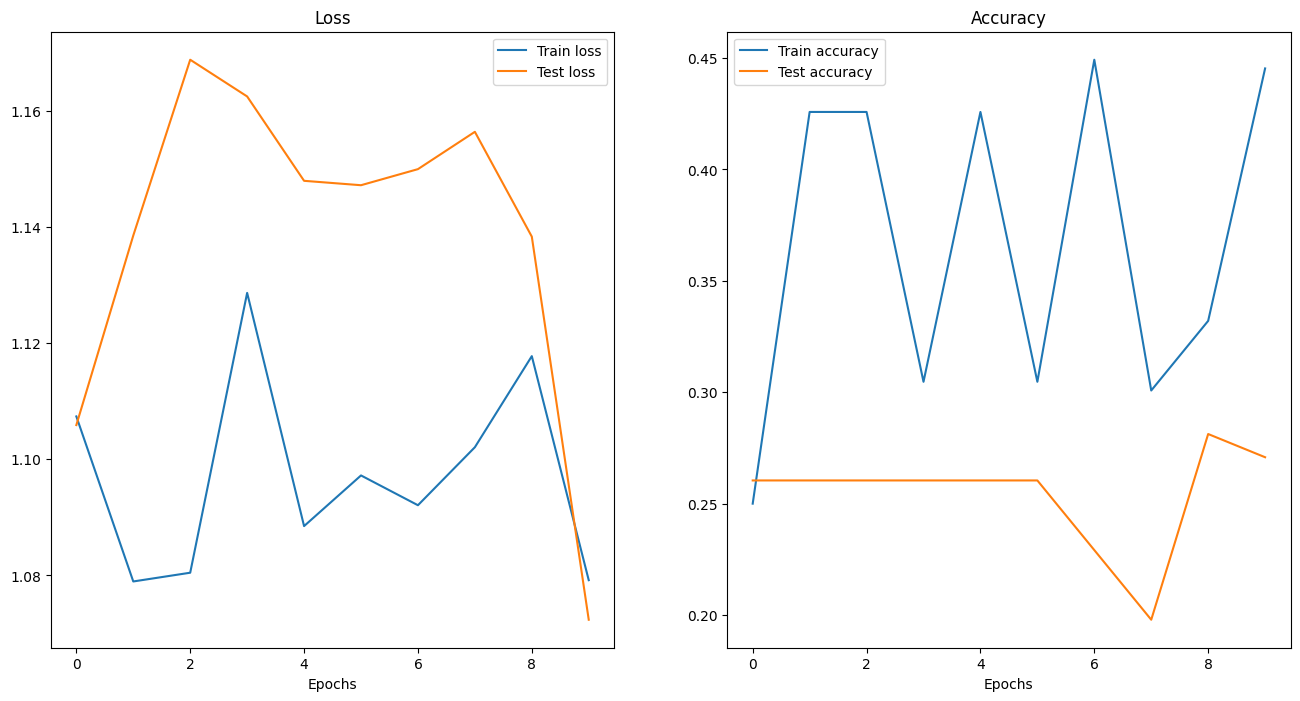

In [116]:
# excellent guide showing loss curve debugging: https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic
# plot the loss curves

def plot_loss_curves(results: Dict[str, List[float]]) -> None:
    train_loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(0, len(train_loss))

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label="Train loss")
    plt.plot(epochs, test_loss, label="Test loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="Train accuracy")
    plt.plot(epochs, test_accuracy, label="Test accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

    plt.show()

plot_loss_curves(model_1_results)

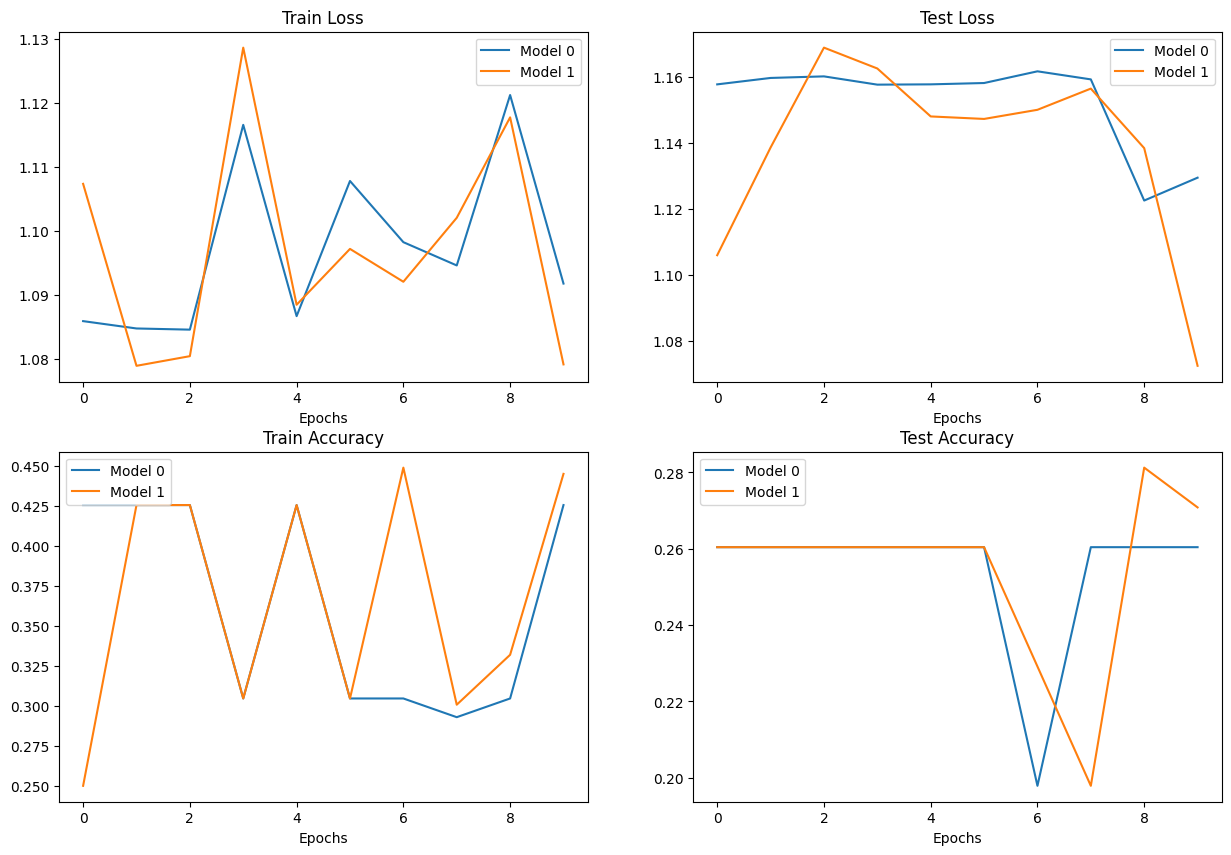

In [117]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)


# Setup a plot 
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

In [106]:
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

data\04-pizza-dad.jpeg already exists, skipping download.


In [107]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[154, 175, 181,  ...,  21,  18,  14],
         [146, 167, 180,  ...,  21,  18,  15],
         [124, 146, 171,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 189, 193,  ...,  22,  19,  15],
         [163, 181, 194,  ...,  22,  19,  16],
         [141, 163, 185,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 106, 104, 102],
         [ 47,  38,  24,  ..., 108, 105, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[117, 138, 145,  ...,  17,  14,  10],
         [109, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  54,  52,  50],
         [ 27,  18,   4,  ...,  50,  47,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 4032, 3024])

Custom image dty

In [108]:
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255. 

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6863, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6549, 0.7059,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6706,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7412, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7098, 0.7608,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7255,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4157, 0.4078, 0.4000],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4118, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4588, 0.5412, 0.5686,  ..., 0.0667, 0.0549, 0.0392],
         [0.4275, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

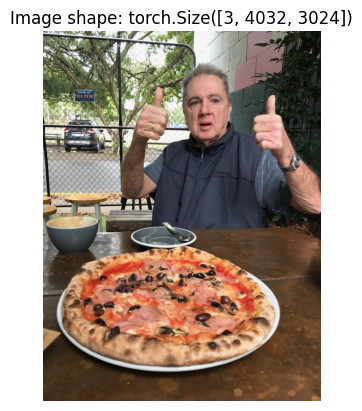

In [109]:
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [110]:
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([3, 64, 64])


C:\Users\Chainsword\AppData\Roaming\Python\Python310\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [111]:
model_1.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)
    
    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")
    
    # Make a prediction on image with an extra dimension
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [112]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

Prediction logits: tensor([[ 0.0351, -0.1505, -0.0155]], device='cuda:0')
Prediction probabilities: tensor([[0.3596, 0.2986, 0.3418]], device='cuda:0')
Prediction label: tensor([0], device='cuda:0')


'pizza'

In [113]:
def pred_and_plot_image(model: torch.nn.Module, 
                        image_path: str, 
                        class_names: List[str] = None, 
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""
    
    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255. 
    
    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)
    
    # 4. Make sure the model is on the target device
    model.to(device)
    
    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)
    
        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))
        
    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    
    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else: 
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

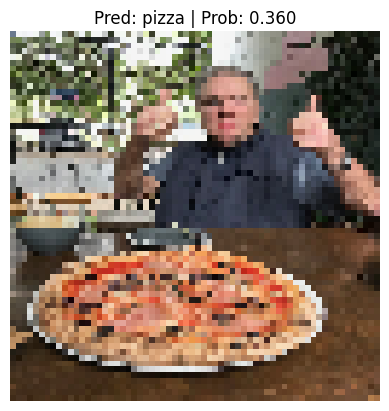

In [114]:
# Pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)